In [61]:
#Using the K-nearest neighbors algorithm, predict how many points NBA players scored in the 2013-2014 season

#Import the required libraries
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#Read the data
nba = pd.read_csv("nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [62]:
#Check the datatype 
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [63]:
#Drop the columns that are not required
nba.drop(['player', 'season', 'season_end'], axis = 1, inplace = True)

In [64]:
#Convert factors to labels
le = LabelEncoder()
nba['pos'] = le.fit_transform(nba['pos'])
nba['bref_team_id'] = le.fit_transform(nba['bref_team_id'])

In [48]:
#Check for missing values
nba.isnull().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
dtype: int64

In [65]:
#Missing values in fg., x3p., and ft. need to be imputed
imp = Imputer(missing_values="NaN", strategy='median', axis=0)
nba = pd.DataFrame(imp.fit_transform(nba), columns = nba.columns)
nba.head()

C:\Users\nkanodia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,5.0,23.0,28.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,...,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,171.0
1,0.0,20.0,20.0,81.0,20.0,1197.0,93.0,185.0,0.503,0.0,...,0.581,142.0,190.0,332.0,43.0,40.0,57.0,71.0,203.0,265.0
2,3.0,27.0,28.0,53.0,12.0,961.0,143.0,275.0,0.520,0.0,...,0.639,102.0,204.0,306.0,38.0,24.0,36.0,39.0,108.0,362.0
3,6.0,28.0,21.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,...,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,1330.0
4,0.0,25.0,18.0,56.0,30.0,951.0,136.0,249.0,0.546,0.0,...,0.836,94.0,183.0,277.0,40.0,23.0,46.0,63.0,187.0,328.0


In [66]:
#Create train and test set
train , test = train_test_split(nba, test_size = 0.3)
train.head()

X_train = train.drop('pts', axis=1)
Y_train = train['pts']

X_test = test.drop('pts', axis = 1)
Y_test = test['pts']

In [67]:
#Perform standard scalar normalization to normalize the feature set
sc = StandardScaler()  
X_train = pd.DataFrame(sc.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns = X_test.columns)
X_train.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,0.174578,1.168033,0.706011,-1.294748,-0.859784,-0.947330,-0.779158,-0.783346,-0.088545,-0.628515,...,-0.615824,0.471550,-0.810156,-0.890739,-0.898997,-0.601064,-0.891135,-0.671306,-0.821304,-1.050561
1,1.160429,0.170678,0.064588,-0.975748,-0.859784,-1.246863,-0.994638,-1.014809,-0.233823,-0.648763,...,-0.894332,-4.889153,-0.875038,-1.050267,-1.035080,-0.742200,-1.057819,-0.813591,-1.008405,-1.402213
2,1.160429,-0.078660,-1.432066,0.978122,1.826730,1.383234,1.241699,1.392413,-0.026282,0.039651,...,1.416535,0.242287,-0.388423,0.822452,0.476949,0.639443,0.331220,0.324696,0.644319,0.763964
3,0.667504,-0.078660,-1.218258,0.499623,-0.022429,-0.221326,-0.534558,-0.497420,-0.213069,-0.385546,...,-0.450224,-0.135322,-0.323541,-0.321987,-0.334506,-0.489641,-0.002150,-0.280019,-0.431511,-0.122199
4,0.667504,-0.826676,-0.576835,1.097747,1.931400,1.869835,2.255039,2.568793,-0.119676,2.914793,...,2.583260,0.936819,0.146853,2.202716,1.646252,1.263411,3.109297,-0.031019,2.375003,1.312541


In [68]:
#Fit KNN algorithm on training data, predict labels for dataset and print the accuracy of the model for different values of K(ranging from 1 to 25)
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    Y_pred = neigh.predict(X_test)
    error = sqrt(mean_squared_error(Y_test, Y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K_value , 'is:', error)

RMSE value for k=  1 is: 118.51433784931707
RMSE value for k=  2 is: 113.08632650050717
RMSE value for k=  3 is: 102.77042450655104
RMSE value for k=  4 is: 101.2845683858279
RMSE value for k=  5 is: 98.02331742305344
RMSE value for k=  6 is: 97.9064629068337
RMSE value for k=  7 is: 97.38233521446618
RMSE value for k=  8 is: 98.11144042046938
RMSE value for k=  9 is: 99.45926643109904
RMSE value for k=  10 is: 101.46202347132916
RMSE value for k=  11 is: 104.04404826005863
RMSE value for k=  12 is: 106.50701256750018
RMSE value for k=  13 is: 107.6982467100533
RMSE value for k=  14 is: 108.26132161541794
RMSE value for k=  15 is: 111.12723893679926
RMSE value for k=  16 is: 113.71065964270593
RMSE value for k=  17 is: 115.88163054109116
RMSE value for k=  18 is: 119.0018093562251
RMSE value for k=  19 is: 120.61056700728149
RMSE value for k=  20 is: 123.40976830783332
RMSE value for k=  21 is: 123.81623728166943
RMSE value for k=  22 is: 124.93184696639558
RMSE value for k=  23 is: 12

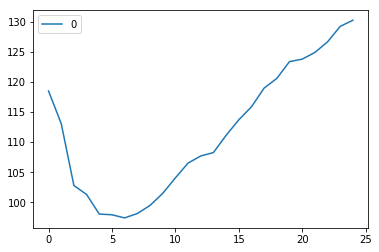

In [69]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [60]:
#When we take k=1, we get a very high RMSE value. The RMSE value decreases as we increase the k value. 
#At k=7, the RMSE is approximately 97.3823, and shoots up on further increasing the k value. 
#We can safely say that k=7 will give us the best result in this case.

In [70]:
#Use gridsearch to find the best value of K
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 4}

In [71]:
#Predicting the values using k=4
model = KNeighborsRegressor(n_neighbors = 4, weights='uniform', algorithm='auto')
model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test)
print("The predicted values are:", Y_pred)

The predicted values are: [7.99500e+02 2.03250e+02 4.59250e+02 1.19000e+02 7.41250e+02 5.26500e+02
 1.11000e+02 9.21000e+02 1.19525e+03 1.04100e+03 2.75000e+00 8.47000e+02
 6.66750e+02 3.90000e+02 1.62250e+02 1.54675e+03 7.17500e+01 8.65000e+02
 9.03750e+02 6.37500e+01 3.64750e+02 5.59500e+02 2.80000e+01 1.92175e+03
 2.03250e+02 3.28750e+02 1.04000e+03 4.99500e+02 1.43500e+02 6.25000e+02
 1.19750e+02 3.32500e+01 8.17500e+01 1.01400e+03 8.25000e+02 8.88000e+02
 1.00550e+03 3.80000e+02 5.87500e+02 3.88500e+02 7.36250e+02 1.97500e+01
 1.57500e+02 2.81000e+02 8.44000e+02 9.95750e+02 7.59500e+02 2.50000e-01
 7.85000e+01 1.00000e+00 6.82500e+01 1.84000e+02 1.43750e+02 1.22325e+03
 3.95750e+02 1.00250e+02 2.21750e+02 3.12250e+02 5.69750e+02 1.22775e+03
 4.60750e+02 3.59250e+02 4.12500e+02 8.80000e+01 2.82000e+02 1.76500e+02
 8.28750e+02 6.23500e+02 1.19725e+03 2.91500e+02 1.21850e+03 8.58750e+02
 1.32150e+03 1.24375e+03 2.00000e+01 3.23250e+02 7.59500e+02 6.23000e+02
 8.34750e+02 5.29250e+02 